In [103]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
from sklearn.neural_network import MLPClassifier


In [104]:
f = open("two_spirals.dat", "r")
data = np.loadtxt(f)

X = data[:, 0:2]  # x, y data points 
Y = data[:, 2]   # labels 1 or 0

Xi_shape = (len(X), 1, 2)
Yi_shape = (len(Y), 1, 1)

train_test_split = 0.9

f'{X[0]} -> {Y[0]}'

'[ 4.47485 -0.89004] -> 1.0'

In [107]:
import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
        {
            'activation' : ['tanh'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (4,2),(5,2),(6,2),(7,2),(8,2)#,(9,),(10,),(11,),(12,),(13,),(14,),(15,)
             ]
        }
       ]

number_of_datapoints = len(X)
train_test_split = int(0.5*number_of_datapoints)
X_train, X_test = X[:train_test_split], X[train_test_split:]
Y_train, Y_test = Y[:train_test_split], Y[train_test_split:]

# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp = GridSearchCV(MLPClassifier(), param_grid, cv=5, scoring='accuracy')
    mlp.fit(X,Y)
    print("Best parameters set found on development set:")
    print(mlp.best_params_)

print("Training set score: %f" % mlp.score(X_train, Y_train))
print("Test set score: %f" % mlp.score(X_test, Y_test))

# plt.show()
clf = MLPClassifier(activation='tanh', hidden_layer_sizes=(8,2), solver='lbfgs')
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

Best parameters set found on development set:
{'activation': 'tanh', 'hidden_layer_sizes': (8, 2), 'solver': 'lbfgs'}
Training set score: 0.613636
Test set score: 0.651515


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.6363636363636364

Minimising error measure
Using Particle Swarm Optimisation (PSO)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     11     4.12e+07   0:00.0
1     22     4.12e+07   0:00.0
2     33     3.66e+07   0:00.0
3     44     3.66e+07   0:00.0
20    231    1042923    0:00.0
40    451    1042923    0:00.1
60    671    179690.2   0:00.1
80    891    179690.2   0:00.1
100   1111   118983.3   0:00.1
120   1331   118983.3   0:00.2
140   1551   118983.3   0:00.2
160   1771   118983.3   0:00.2
180   1991   116933.8   0:00.2
200   2211   116933.8   0:00.2
220   2431   116933.8   0:00.3
240   2651   116933.8   0:00.3
260   2871   116933.8   0:00.3
280   3091   116933.8   0:00.3
300   3311   107929.3   0:00.3
320   3531   107929.3   0:00.4
340   3751   107929.3   0:00.4
360   3971   107929.3   0:00.4
380   4191   107929.3   0:00.4
400   4411   107929.3   0:00.4
420   4631   107929.3   0:00.5
440   4851   107929.3   0:00.5
460   5071   107929.3   0:00.5
480   5291   107929.

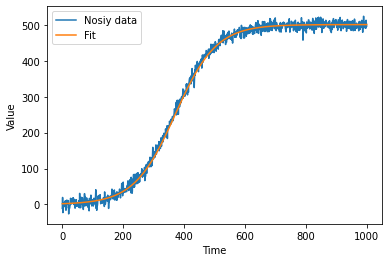

In [42]:
# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])

# Perform an optimization with boundaries and hints
x0 = [0, 700]
found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.PSO,
    )

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
pl.figure()
pl.xlabel('Time')
pl.ylabel('Value')
pl.plot(times, values, label='Nosiy data')
pl.plot(times, problem.evaluate(found_parameters), label='Fit')
pl.legend()
pl.show()